In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Diabetes dataset loaded ")
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Diabetes dataset loaded 
Train shape: (353, 10) Test shape: (89, 10)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Baseline Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predictions
lin_preds = lin_reg.predict(X_test_scaled)

# Evaluation
print(" Linear Regression Performance on Diabetes Dataset:")
print(f"MSE: {mean_squared_error(y_test, lin_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, lin_preds):.2f}")
print(f"R²: {r2_score(y_test, lin_preds):.4f}")


 Linear Regression Performance on Diabetes Dataset:
MSE: 2900.19
MAE: 42.79
R²: 0.4526


In [8]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_preds = ridge.predict(X_test_scaled)

# Lasso
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
lasso_preds = lasso.predict(X_test_scaled)

# Elastic Net
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
elastic.fit(X_train_scaled, y_train)
elastic_preds = elastic.predict(X_test_scaled)

# Evaluation
print("\n Regularized Models Performance on Diabetes Dataset:")
print(f"Ridge → MSE: {mean_squared_error(y_test, ridge_preds):.2f} | "
      f"MAE: {mean_absolute_error(y_test, ridge_preds):.2f} | "
      f"R²: {r2_score(y_test, ridge_preds):.4f}")

print(f"Lasso → MSE: {mean_squared_error(y_test, lasso_preds):.2f} | "
      f"MAE: {mean_absolute_error(y_test, lasso_preds):.2f} | "
      f"R²: {r2_score(y_test, lasso_preds):.4f}")

print(f"Elastic Net → MSE: {mean_squared_error(y_test, elastic_preds):.2f} | "
      f"MAE: {mean_absolute_error(y_test, elastic_preds):.2f} | "
      f"R²: {r2_score(y_test, elastic_preds):.4f}")



 Regularized Models Performance on Diabetes Dataset:
Ridge → MSE: 2892.01 | MAE: 42.81 | R²: 0.4541
Lasso → MSE: 2884.62 | MAE: 42.81 | R²: 0.4555
Elastic Net → MSE: 2866.46 | MAE: 42.87 | R²: 0.4590


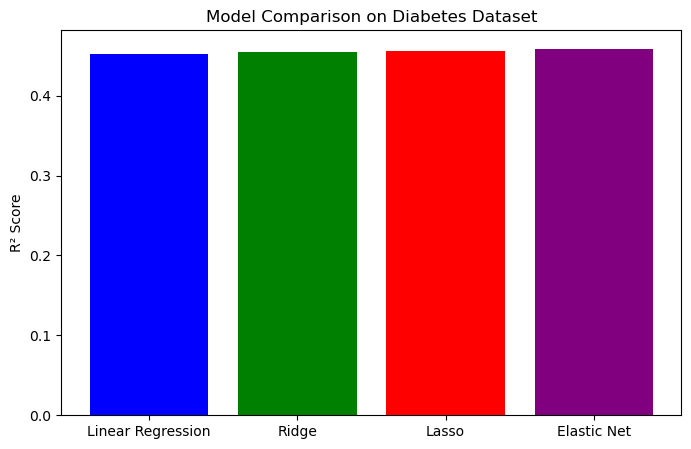

In [10]:
import matplotlib.pyplot as plt

# Collect results
results = {
    "Linear Regression": r2_score(y_test, lin_preds),
    "Ridge": r2_score(y_test, ridge_preds),
    "Lasso": r2_score(y_test, lasso_preds),
    "Elastic Net": r2_score(y_test, elastic_preds)
}

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple'])
plt.ylabel("R² Score")
plt.title("Model Comparison on Diabetes Dataset")
plt.show()

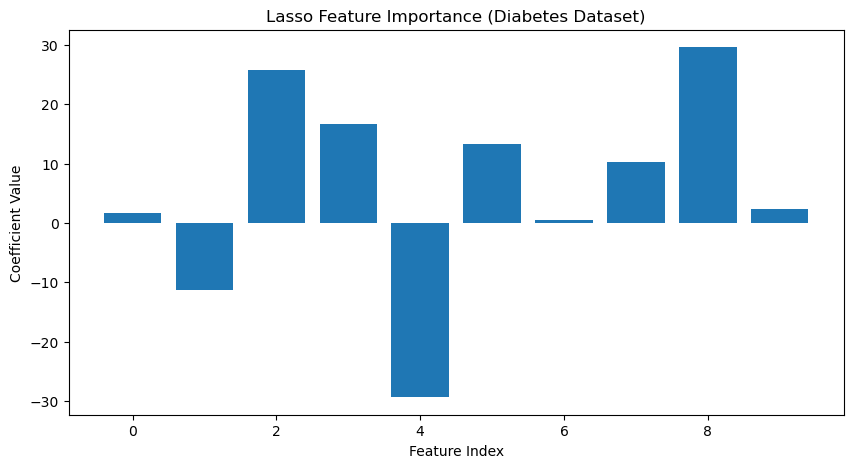

In [12]:
import numpy as np

# Get coefficients from Lasso
coefficients = lasso.coef_

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.bar(range(len(coefficients)), coefficients)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Lasso Feature Importance (Diabetes Dataset)")
plt.show()